In [ ]:
#Import libraries need for data manipulation and visualization

import pandas as pd
import numpy as np
import re
import os
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Phenophase Data

In [ ]:
#read in phenophase data
phen_base = pd.read_csv('phen_base.csv')

In [ ]:
phen_base

,Site_ID,Latitude,Longitude,State,Genus,Individual_ID,Phenophase_Description,year,First_Yes_Month,First_Yes_Day,DOY,Region
0,209,43.799999,-72.269997,VT,Syringa,3475,First leaf,1980,5,2,123,Northeast
1,209,43.799999,-72.269997,VT,Syringa,3475,First bloom,1980,5,21,142,Northeast
2,177,43.970085,-74.217880,NY,Syringa,3521,First leaf,1980,4,30,121,Northeast
3,65,41.972836,-73.220451,CT,Syringa,3906,First leaf,1980,4,22,113,Northeast
4,65,41.972836,-73.220451,CT,Syringa,3906,First bloom,1980,5,21,142,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...
3782,38658,44.145035,-68.851357,ME,Syringa,239777,First leaf,2020,4,29,120,Northeast
3783,38398,43.027870,-75.979095,NY,Syringa,240184,First bloom,2020,5,20,141,Northeast
3784,38398,43.027870,-75.979095,NY,Syringa,240184,First leaf,2020,5,18,139,Northeast
3785,38956,41.802170,-70.556267,MA,Syringa,242065,First bloom,2020,5,18,139,Northeast


## 1.1 Lilac (Syringa) Observation Locations (1980 - 2020)

In [ ]:
# Compute counts for each unique latitude-longitude pair
phen_base['count'] = phen_base.groupby(['Latitude', 'Longitude']).transform('count')['year']

fig = px.scatter_geo(phen_base, locationmode='USA-states',
                     lat='Latitude', lon='Longitude',
                     projection="albers usa", 
                     title='Lilac (<i>Syringa<i>) Phenophase Observations in The United States 1980 - 2020',                     
                     color='count' 
                    )

fig.update_geos(
    visible=False, resolution=110, 
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black"
)

fig.show()


The site locations are scattered across the Northeast.  The counts are the number of phenophase observations made and can include multiple plants per site and multiple observations per plant.  Most locations only have a few observations but some sites have been monitored for many years.  

## 1.2 Observations Per Year

Text(0.5, 9.444444444444438, 'Year')

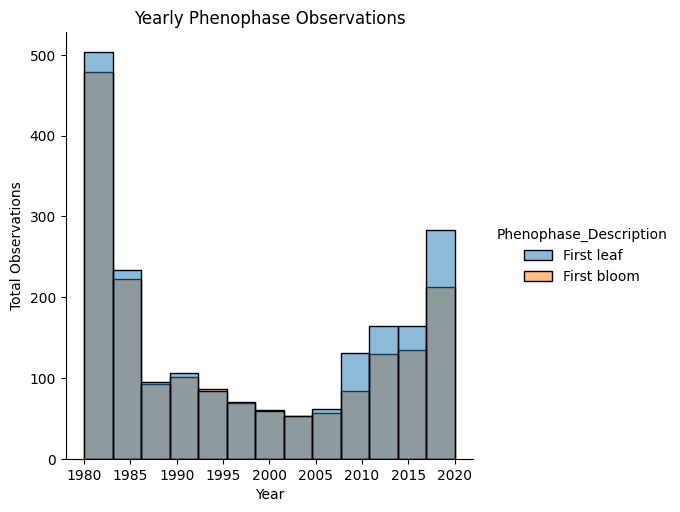

In [ ]:
sns.displot(phen_base, x="year", hue='Phenophase_Description')
plt.title('Yearly Phenophase Observations')
plt.ylabel('Total Observations')
plt.xlabel('Year')

As we noted in our Milestone I final report, there is a large decrease from ~1985 to ~2010 where there was a drop in the number of observations recorded. This is due to the history of the volunteer program.  Official observations of lilac and honeysuckle species began in the US in the late 1960s to help with agricultural forecasts.  That program ended, for most site locations, in the late 1980s. In 2009, Nature’s Notebook, a program that consists of professional and citizen scientists, restarted and expanded the effort to observe both plant and animal phenologies (https://doi.org/10.1038/sdata.2015.38).  Data during these lean data years may not be representative of the entire population and are more likely to be biased towards those individuals.

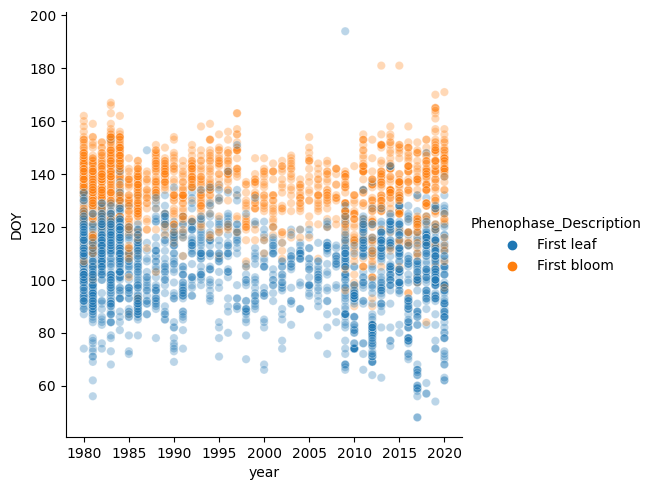

In [ ]:
sns.relplot(phen_base, x='year', y='DOY', hue='Phenophase_Description', alpha=0.3)

There are earlier first leaf dates visible.  Due to the volunteer collection it would be hard to know just from this if it is due to collection habits or if it is due to climate.

Text(0.5, 36.72222222222221, 'Year')

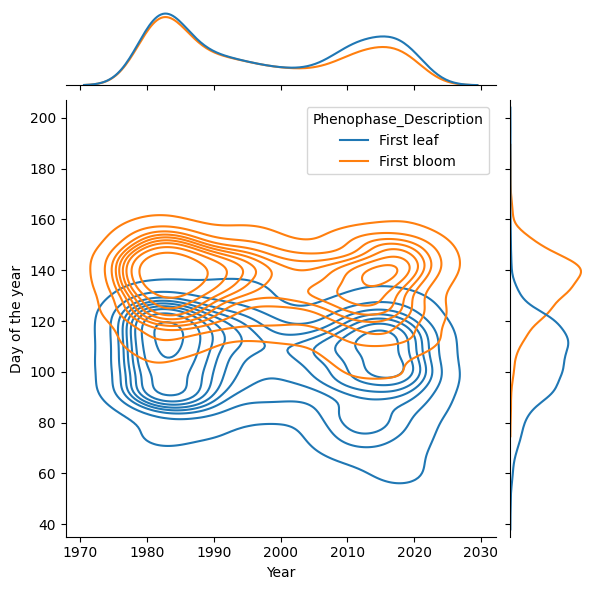

In [ ]:
# Kernel Distribution plot
# 
g = sns.jointplot(
    data=phen_base,
    x="year", y="DOY", hue="Phenophase_Description",
    kind="kde",
)

plt.ylabel('Day of the year')
plt.xlabel('Year')

Significant variability from the 1970s through approximately the 2000s. Then we observe some stabilization except for the year 2020, We thought that COVID pandemic may have influenced the data recollection for this period.

There was a consistent period in the late 1990s and early 2000s where "First bloom" occurred around DOY 125-150.

First leaf typically occurs earlier in the year than "First bloom". The range of variability (spread) for "First leaf" seems to be more consistent than "First bloom", especially around the 2000s where "First bloom" has a significant spread indicating it happened much earlier in some years and much later in others.

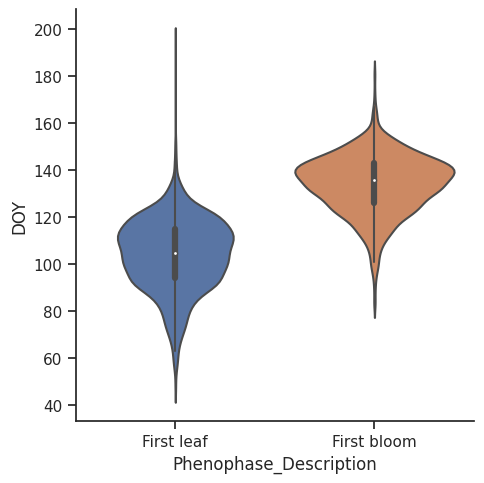

In [ ]:
sns.set_theme(style="ticks")
sns.catplot(data=phen_base, x="Phenophase_Description", y="DOY", kind="violin")

# 2. Weather Data

In [ ]:
weather = pd.read_csv('weather.csv').rename(columns = {'dayl (s)':'dayl', 
                                   'prcp (mm/day)': 'prcp',
                                    'srad (W/m^2)': 'srad',
                                    'swe (kg/m^2)': 'swe',
                                    'tmax (deg c)': 'tmax',
                                    'tmin (deg c)': 'tmin',
                                    'vp (Pa)': 'vp'})

#select only variables needed
df = weather[['Site_ID', 'DOY', 'year', 'dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp']]

In [ ]:
df.describe()

,Site_ID,DOY,year,dayl,prcp,srad,swe,tmax,tmin,vp
count,6.165580e+06,6.165580e+06,6.165580e+06,6.165580e+06,6.165580e+06,6.165580e+06,6.165580e+06,6.165580e+06,6.165580e+06,6.165580e+06
mean,1.507227e+04,1.830000e+02,2.000000e+03,4.320013e+04,3.319032e+00,3.065357e+02,2.381326e+01,1.453638e+01,3.359079e+00,9.453465e+02
std,1.063973e+04,1.053660e+02,1.183216e+01,7.804469e+03,7.644769e+00,1.269923e+02,5.092895e+01,1.084557e+01,1.012773e+01,5.993888e+02
min,2.000000e+00,1.000000e+00,1.980000e+03,3.003495e+04,0.000000e+00,1.674000e+01,0.000000e+00,-2.725000e+01,-3.934000e+01,1.990000e+01
25%,6.353000e+03,9.200000e+01,1.990000e+03,3.562355e+04,0.000000e+00,2.035800e+02,0.000000e+00,5.720000e+00,-3.420000e+00,4.733900e+02
50%,1.472050e+04,1.830000e+02,2.000000e+03,4.319981e+04,0.000000e+00,2.980700e+02,0.000000e+00,1.529000e+01,3.580000e+00,7.847600e+02
75%,1.791750e+04,2.740000e+02,2.010000e+03,5.077666e+04,3.140000e+00,4.068800e+02,1.862000e+01,2.389000e+01,1.165000e+01,1.358680e+03
max,3.904900e+04,3.650000e+02,2.020000e+03,5.636505e+04,2.194900e+02,7.872500e+02,5.179200e+02,3.991000e+01,2.740000e+01,3.648180e+03


## 2.1 Correlation Matrix

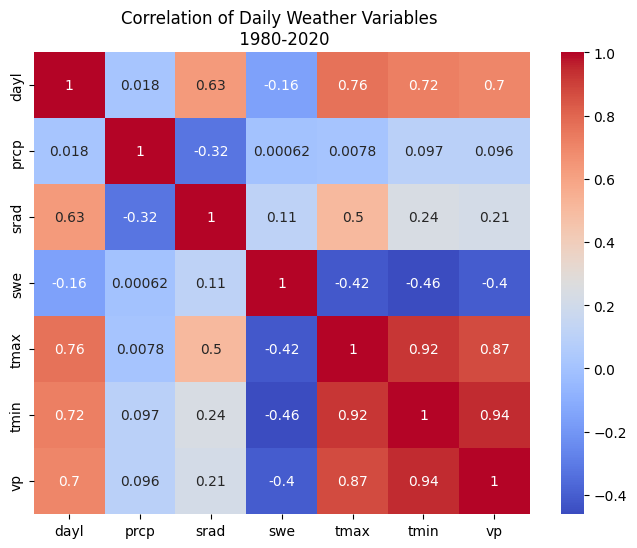

In [ ]:
#look at correlations of the data variables
#from https://sinanthahir.medium.com/experience-analysis-through-weather-data-exploratory-data-analysis-b438ceca8a9b

features = ['dayl','prcp','srad','swe','tmax','tmin','vp']

# assign data correlation matrix
wea_corr = df[features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(data=wea_corr, annot=True, cmap = 'coolwarm')
plt.title("Correlation of Daily Weather Variables \n 1980-2020")
plt.show()

The above correlation matrix (standard pearson) shows the following:

Positive linear correlation: We would expect daylength to be positively correlated with solar radiation and temperature. And vapor pressure we would expect to be positively correlated with daylength, as vapor pressure is directly proportional to temperature. We also see expectation that the daytime high would be correlated with the nighttime low.

Negative linear correlation: Here we see that the snow water equivalent is correlated with temperature, as we would naturally expect. Also, precipitation is negatively correlated with solar radiation, which again we would naturally expect.

All in all, no surprises in the correlation matrix, which is good.

## 2.2 Outlier Detection

<AxesSubplot: title={'center': 'Boxplot of Daily Weather Variables \n1980-2020'}>

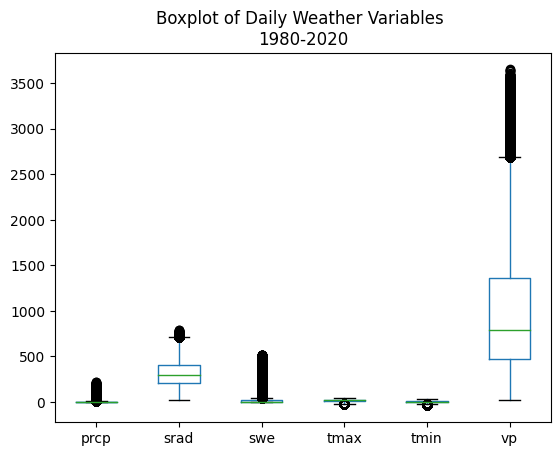

In [ ]:
df[['prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp']].plot(kind ='box',title='Boxplot of Daily Weather Variables \n1980-2020')

While there are outliers, there are no obvious outliers to remove or be too concerned about. This is due, in part, to the nature of the weather data. The data is from a gridded dataset that was created through modeling techniques. The daylength variable was not included in the figure as it is bound to geography and physics. And the describe method on the dataframe revealed nothing unusual.

## 2.3 Weather - Annual Averages

In [ ]:
ann_avg = df.groupby(['year'])[['dayl','prcp','srad','swe','tmax','tmin','vp']].mean().reset_index()

In [ ]:
ann_avg

,year,dayl,prcp,srad,swe,tmax,tmin,vp
0,1980,43200.1323,2.639638,312.042478,16.814513,13.934910,2.358016,903.031399
1,1981,43200.1323,3.053839,304.588621,18.605699,14.194191,2.914707,918.623140
2,1982,43200.1323,2.866493,318.467482,35.479437,14.134268,2.333578,885.695276
3,1983,43200.1323,4.024678,309.148903,30.918669,14.693029,3.365622,938.521992
4,1984,43200.1323,3.374922,306.143081,19.490346,14.428660,3.117796,930.363514
5,1985,43200.1323,2.771402,311.023168,17.399741,14.305804,2.756053,898.926933
6,1986,43200.1323,3.226181,309.713190,33.372103,14.279046,2.921466,906.526365
7,1987,43200.1323,3.001004,306.428909,18.898784,14.524828,2.997668,920.318863
8,1988,43200.1323,2.841513,308.669447,15.504453,14.419685,2.658266,913.785661
9,1989,43200.1323,3.416326,307.171106,22.544919,13.755842,2.318538,913.593742


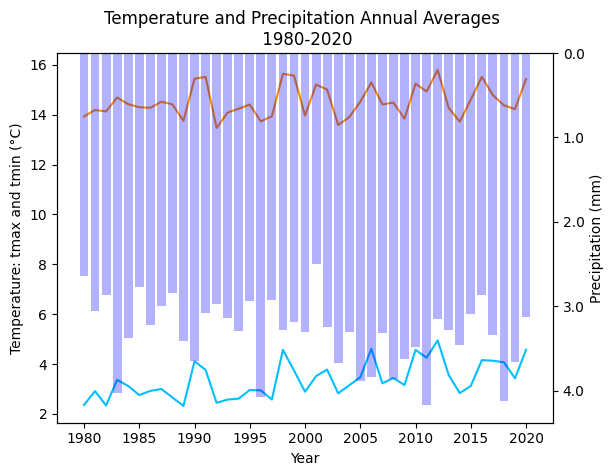

In [ ]:
fig, ax = plt.subplots()

# x axis to plot both temp and precip. against
x = ann_avg['year']

ax.plot(x, ann_avg['tmax'], color="darkorange")
ax.plot(x, ann_avg['tmin'], color="deepskyblue")

# Create second axes, in order to get the bars from the top you can multiply 
# by -1
ax2 = ax.twinx()
ax2.bar(x, -ann_avg['prcp'], color="blue", alpha = 0.3)

# Now need to fix the axis labels
max_pre = max(ann_avg['prcp'].astype(int))
y2_ticks = np.linspace(0, max_pre, max_pre+1)
y2_ticklabels = [str(i) for i in y2_ticks]
ax2.set_yticks(-1 * y2_ticks)
ax2.set_yticklabels(y2_ticklabels)


plt.title('Temperature and Precipitation Annual Averages \n 1980-2020')
ax.set_xlabel ('Year')
ax.set_ylabel ('Temperature: tmax and tmin (°C)')
ax2.set_ylabel('Precipitation (mm)')

plt.show()

The above chart is a typical way to show temperature and precipitation in the same graph.  There are some interesting patterns to note.  We can see the average daily precipitation for each year, which can give us some indication of a dry or wet year, a better indicator would be the precipitation totals. And while it is difficult to visually see a trend in the maximum temperatures, there is a noticeable increasing trend in the minimum temperatures.  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6bbd9398-18f2-46ef-ba4f-be9bc7f4116a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>